##[Bibliografía de Teneto](https://teneto.readthedocs.io/_/downloads/en/latest/pdf/)

In [ ]:
!pip install --quiet teneto

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.0/32.0 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 707.6/707.6 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.1/180.1 kB 12.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
from teneto import TemporalNetwork

tnet = TemporalNetwork()

np.random.seed(2019)
#3 nodos, 2 tiempos
tnet.generatenetwork('rand_binomial',size=(3,2), prob=0.5)
print(tnet.network[:])

[[[0. 0.]
  [1. 1.]
  [1. 0.]]

 [[1. 1.]
  [0. 0.]
  [0. 0.]]

 [[1. 0.]
  [0. 0.]
  [0. 0.]]]


No hay lazo del nodo 0 a si mismo en t=0 ni t=1

In [ ]:
tnet.network[0, 0, :]

array([0., 0.])

Hay una arista del nodo 0 al nodo 1 en el tiempo t=0 y en t=1

In [ ]:
tnet.network[0, 1, :]

array([1., 1.])

Hay una arista del nodo 0 al nodo 2 en t=0, pero no en t=1

In [ ]:
tnet.network[0, 2, :]

array([1., 0.])

In [ ]:
import pandas as pd
import numpy as np

# Asumimos que tnet.network es un array 3D de numpy (nodos, nodos, tiempos)
# Convertimos el array 3D de numpy a un DataFrame de lista de aristas
nodes, _, times = tnet.network.shape # Obtenemos las dimensiones del array

# Creamos una lista vacía para almacenar las aristas
edges = []

# Iteramos a través del tiempo, nodos fuente y nodos destino
for t_idx in range(times):
    for i_idx in range(nodes):
        for j_idx in range(nodes):
            weight = tnet.network[i_idx, j_idx, t_idx]
            # Solo añadimos aristas con un peso (asumiendo que 0 significa que no hay arista)
            if weight != 0:
                edges.append({'i': i_idx, 'j': j_idx, 't': t_idx, 'weight': weight})

# Convertimos la lista de diccionarios a un DataFrame
network_df = pd.DataFrame(edges)

display(network_df.head(10))

,i,j,t,weight
0,0,1,0,1.0
1,0,2,0,1.0
2,1,0,0,1.0
3,2,0,0,1.0
4,0,1,1,1.0
5,1,0,1,1.0


In [ ]:
network_df.shape

(6, 4)

Puedes inspeccionar diferentes partes de la red llamando a tnet.get_network_when() y especificando un argumento i, j o t.

In [ ]:
tnet.get_network_when(i=1)

,i,j,t,weight
0,1,0,0,1.0
1,1,0,1,1.0


In [ ]:
tnet.get_network_when(j=1)

,i,j,t,weight
0,0,1,0,1.0
1,0,1,1,1.0


In [ ]:
tnet.get_network_when(i=1, t=0)

,i,j,t,weight
0,1,0,0,1.0


## Tipos de redes
bu, bd, wu, wd

b: binario

w: con pesos

u: no dirigida

d: dirigida

In [ ]:
np.random.seed(2019)
G = np.random.beta(1, 1, [3,3,2]) #3 nodos 2 tiempos
#diagonal: Si es false se eliminan los lazos
tnet = TemporalNetwork(from_array=G, nettype='wd', diagonal=True)
tnet.network

array([[[0.62881997, 0.05908437],
        [0.83397431, 0.85650926],
        [0.51867029, 0.37095074]],

       [[0.67342242, 0.53977806],
        [0.78089779, 0.44724686],
        [0.52269736, 0.04666516]],

       [[0.54242292, 0.60766971],
        [0.43190771, 0.60123545],
        [0.53591418, 0.30817286]]])

In [ ]:
def network_df(network):
  nodes, _, times = tnet.network.shape
  edges = []

  for t_idx in range(times):
      for i_idx in range(nodes):
          for j_idx in range(nodes):
              weight = tnet.network[i_idx, j_idx, t_idx]
              if weight != 0:
                  edges.append({'i': i_idx, 'j': j_idx, 't': t_idx, 'weight': weight})

  network_df = pd.DataFrame(edges)
  display(network_df.head(10))

In [ ]:
network_df(tnet.network)

,i,j,t,weight
0,0,0,0,0.628820
1,0,1,0,0.833974
2,0,2,0,0.518670
3,1,0,0,0.673422
4,1,1,0,0.780898
5,1,2,0,0.522697
6,2,0,0,0.542423
7,2,1,0,0.431908
8,2,2,0,0.535914
9,0,0,1,0.059084


In [ ]:
#3 nodos y 2 tiempos
tnet.netshape

(3, 2)

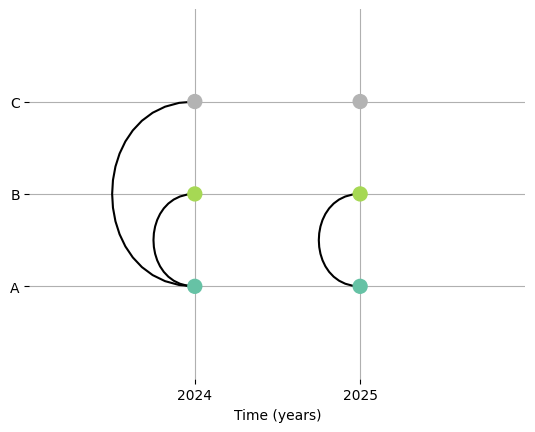

In [ ]:
import matplotlib.pyplot as plt

#etiquetas de tiempo
tlabs = ['2024','2025']
#unidades de tiempo
tunit = 'years'

#etiquetas de nombres
nlabs = ['A', 'B', 'C']
tnet = TemporalNetwork(nodelabels=nlabs, timeunit=tunit, timelabels=tlabs,nettype='bu')

np.random.seed(2019)
tnet.generatenetwork('rand_binomial',size=(3,2), prob=0.5)
tnet.plot('slice_plot', cmap='Set2')
plt.show()

## Construcción de Redes

### DataFrame

In [ ]:
netin = {'i': [0,0,1,1],
         'j': [1,2,2,2],
         't': [0,0,0,1],
         'weight': [0.5,0.75,0.25,1]}
df = pd.DataFrame(data=netin)
tnet = TemporalNetwork(from_df=df)
print(tnet.network)

   i  j  t
0  0  1  0
1  0  2  0
2  1  2  0
3  1  2  1


/usr/local/lib/python3.12/dist-packages/teneto/classes/network.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.network['i'] = self.network['i'].astype(int)
/usr/local/lib/python3.12/dist-packages/teneto/classes/network.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.network['j'] = self.network['j'].astype(int)


### Lista de enlaces

In [ ]:
edgelist = [[0,1,0,0.5],
            [0,1,1,0.75]]
tnet = TemporalNetwork(from_edgelist=edgelist)
tnet.network

,i,j,t,weight
0,0,1,0,0.50
1,0,1,1,0.75


## Métricas
Con el módulo `teneto.networkmeasures`

Varias tienen una versión global y una por comunidades

`calc=’global’ `
`calc=’communities’ `

### Métricas de Centralidad

Las medidas de centralidad cuantifican un valor por nodo.

* `temporal_degree_centrality()`
* `temporal_betweenness_centrality()`
* `temporal_closeness_centrality()`
* `topological_overlap()`
* `bursty_coeff()`

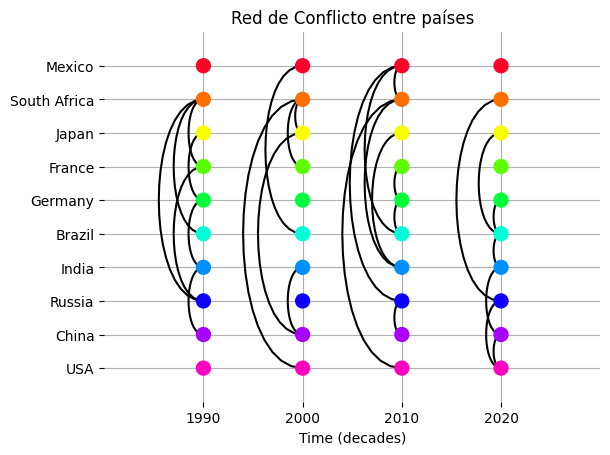

In [ ]:
#Etiquetas de tiempo
tlabs_decades = ['1990', '2000', '2010', '2020']
tunit_decades = 'decades'

nlabs_countries = [
    'USA', 'China', 'Russia', 'India', 'Brazil',
    'Germany', 'France', 'Japan', 'South Africa', 'Mexico'
]

#Red Temporal
metric_tnet = TemporalNetwork(
    nodelabels=nlabs_countries,
    timeunit=tunit_decades,
    timelabels=tlabs_decades,
    nettype='bu' #Ambos tienen conflictos a la vez
)

np.random.seed(42)

# Generar la red: 10 nodos (países), 4 tiempos (décadas), probabilidad de conflicto 0.15
metric_tnet.generatenetwork('rand_binomial',
                            size=(len(nlabs_countries),
                            len(tlabs_decades)),
                            prob=0.15)

metric_tnet.plot('slice_plot', cmap='gist_rainbow_r')
plt.title('Red de Conflicto entre países')
plt.show()

In [ ]:
metric_tnet.netshape

(10, 4)

$D_{i} = \sum_t\sum_j A_{ijt}$

$D_{it} = \sum_j A_{ijt}$

In [ ]:
import teneto.networkmeasures as tnm
# 1. temporal_degree_centrality()
degree_centrality = tnm.temporal_degree_centrality(metric_tnet, calc='global')
display(pd.DataFrame(degree_centrality, index=metric_tnet.nodelabels, columns=['Centralidad de Grado']))

,Centralidad de Grado
USA,4.0
China,6.0
Russia,6.0
India,7.0
Brazil,7.0
Germany,5.0
France,4.0
Japan,5.0
South Africa,10.0
Mexico,4.0


$B_{it} = {1 \over (N-1)(N-2)} \sum_{j = 1; j \neq i}
\sum_{k = 1; k \neq i,j} {\sigma^i_{jkt} \over \sigma_{jk}}$

In [ ]:
# 2. temporal_betweenness_centrality()
betweenness_centrality = tnm.temporal_betweenness_centrality(metric_tnet, calc='global') # Usamos 'global'
print("\n--- Centralidad de Intermediación Temporal (Agregada) ---")
display(pd.DataFrame(betweenness_centrality, index=metric_tnet.nodelabels, columns=['Centralidad de Intermediación']))

$\begin{split}C^T_{i} = {{1} \over {N-1}}\sum_j{1\over\\tau_{ij}}\end{split}$

In [ ]:
# 3. temporal_closeness_centrality()
closeness_centrality = tnm.temporal_closeness_centrality(metric_tnet)
display(pd.DataFrame(closeness_centrality, index=metric_tnet.nodelabels, columns=['Centralidad de Cercanía']))

KeyboardInterrupt: 

El solapamiento topológico (topological overlap) cuantifica la persistencia de las aristas a lo largo del tiempo.

Si dos puntos de tiempo consecutivos tienen aristas similares, este valor es alto (máximo 1).
Si hay mucho cambio, el valor se aproxima a 0.

* Por tiempo: $TopoOverlap_{i,t} = {\sum_j G_{i,j,t} G_{i,j,t+1}
\over \sqrt{\sum_j G_{i,j,t} \sum_j G_{i,j,t+1}}}$
* Por nodo: $AvgTopoOverlap_{i} = {1 \over T-1} \sum_t TopoOverlap_{i,t}$

In [ ]:
# 4. topological_overlap()
topological_overlap = tnm.topological_overlap(metric_tnet, calc='pertime')
display(pd.DataFrame(topological_overlap, index=metric_tnet.nodelabels))

topological_overlap = tnm.topological_overlap(metric_tnet, calc='node')
display(pd.DataFrame(topological_overlap, index=metric_tnet.nodelabels))

/usr/local/lib/python3.12/dist-packages/teneto/networkmeasures/topological_overlap.py:143: RuntimeWarning: invalid value encountered in divide
  topo_overlap = numerator / denominator


,0,1,2,3
USA,0.000000,1.000000,0.000000,NaN
China,0.707107,0.000000,0.000000,NaN
Russia,0.000000,0.000000,0.000000,NaN
India,0.707107,0.000000,0.000000,NaN
Brazil,0.000000,0.707107,0.408248,NaN
Germany,0.000000,0.000000,0.707107,NaN
France,0.707107,0.000000,0.000000,NaN
Japan,0.000000,0.000000,0.000000,NaN
South Africa,0.333333,0.333333,0.000000,NaN
Mexico,0.000000,0.577350,0.000000,NaN


/usr/local/lib/python3.12/dist-packages/teneto/networkmeasures/topological_overlap.py:143: RuntimeWarning: invalid value encountered in divide
  topo_overlap = numerator / denominator


,0
USA,0.333333
China,0.235702
Russia,0.000000
India,0.235702
Brazil,0.371785
Germany,0.235702
France,0.235702
Japan,0.000000
South Africa,0.222222
Mexico,0.192450


El **coeficiente de explosividad (burstiness coefficient, B)** mide qué tan **irregular o concentrada en ráfagas** es la ocurrencia de eventos en el tiempo (por ejemplo, contactos o interacciones en una red temporal).

Se define como:

$
B = \frac{\sigma_{ICT} - \mu_{ICT}}{\sigma_{ICT} + \mu_{ICT}}
$

donde:  
- $\mu_{ICT} $: **media** de los tiempos entre contactos (*inter-contact times*).  
- $\sigma_{ICT}$: **desviación estándar** de los tiempos entre contactos.

---

### Interpretación:
- **B > 0** → comportamiento **explosivo o “bursty”**: los contactos ocurren en ráfagas cortas, seguidas de largos periodos sin actividad.  
  *Ejemplo:* interacciones en redes sociales o correos electrónicos (varios mensajes seguidos y luego silencio).  
- **B = 0** → comportamiento **aleatorio**: los contactos siguen una distribución exponencial, como un proceso de Poisson.  
  *Ejemplo:* llamadas telefónicas aleatorias a lo largo del día.  
- **B < 0** → comportamiento **periódico o regular**: los contactos ocurren a intervalos casi constantes.  
  *Ejemplo:* sensores que se comunican cada 10 segundos o una persona que revisa el correo a horas fijas.

---


In [ ]:
# 5. bursty_coeff()
bursty_coeff_matrix = tnm.bursty_coeff(metric_tnet)
bursty_coeff_matrix

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, -1. ,  nan],
       [ nan,  nan,  nan, -0.5,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, -1. ,  nan],
       [ nan, -0.5,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan, -1. ,  nan,  nan,  nan, -1. ],
       [ nan,  nan,  nan,  nan, -1. ,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, -1. ,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [-1. ,  nan, -1. ,  nan,  nan,  nan, -1. ,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan, -1. ,  nan,  nan,  nan,  nan,  nan]])

La mayoria de relaciones son regulares o inexistentes

## TCTC (Temporal Communities by Trajectory Clustering)

Es un algoritmo para encontrar comunidades temporales en series de tiempo. Requiere:
* varias series de tiempo
* las series de tiempo son de nodos de una red

La mayoría de los métodos de detección de comunidades requieren primero crear una “inferencia de aristas”, donde se calculan las conexiones entre los diferentes nodos.

TCTC, en cambio, encuentra primero agrupamientos de trayectorias en las series de tiempo sin inferir aristas.
El agrupamiento de trayectorias intenta reunir nodos que tengan rutas similares en ese espacio.

Los hiperparámetros de TCTC determinan qué tipo de trayectorias se encuentran en los datos.
Hay cuatro hiperparámetros principales:

* $\textbf{Parámetro de distancia máxima}$ ($\epsilon$): la distancia entre todos los nodos que formen parte de la misma trayectoria debe ser menor o igual a $\epsilon$.
* $\textbf{Parámetro de tamaño mínimo}$ ($\sigma$): todas las trayectorias deben incluir al menos $\sigma$ nodos.
* $\textbf{Parámetro de tiempo mínimo}$ ($\tau$): todas las trayectorias deben persistir durante al menos $\tau$ puntos temporales.
* $\textbf{Parámetro de tolerancia}$($\kappa$): pueden existir hasta $\kappa$ puntos temporales consecutivos como “excepciones” antes de que la trayectoria termine.

El algoritmo sí permite que un nodo pertenezca a mas de una comunidad


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from teneto.communitydetection import tctc
import pandas as pd

In [ ]:
data = np.array([[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1],
                 [0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 2, 2, 1],
                 [1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0],
                 [-1, 0, 1, 1, 0, -1, 0, -1, 0, 2, 1, 0,-1]], dtype=float)
data = data.transpose()
np.random.seed(2019)
data += np.random.uniform(-0.2, 0.2, data.shape)

(13, 4)


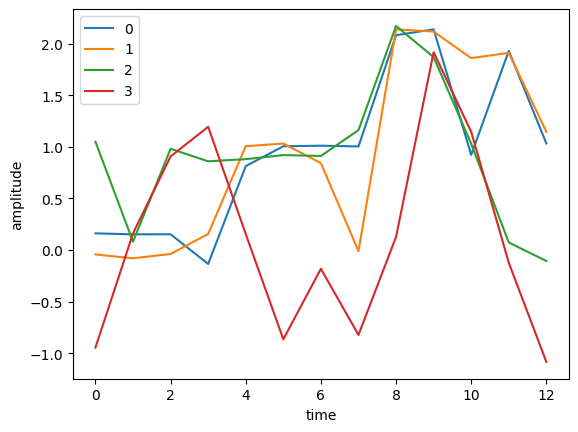

In [ ]:
# Lets have a look at the data
fig, ax = plt.subplots(1)
p = ax.plot(data)
ax.legend(p, [0,1,2,3])
ax.set_xlabel('time')
ax.set_ylabel('amplitude')
print(data.shape)

Existen 2 posibles outputs:

* Arreglo binario (dimensiones: nodo, nodo, tiempo), donde cada valor 1 indica que dos nodos pertenecen a la misma comunidad.

* Dataframe, donde cada fila representa una comunidad.

La salida predeterminada es la opción uno.

In [ ]:
parameters = {
'epsilon': 0.5,
'tau': 3,
'sigma': 2,
'kappa': 0
}
tctc_array = tctc(data, **parameters)
print(tctc_array.shape)

(4, 4, 13)


In [ ]:
parameters = {
'epsilon': 0.5,
'tau': 3,
'sigma': 2,
'kappa': 0
}
tctc_df = tctc(data, **parameters, output='df')
print(tctc_df.head())

   community  start  end  size  length
0     [0, 1]      0    7   2.0       7
1     [2, 3]      1    4   2.0       3
2  [0, 1, 2]      4    7   3.0       3
3     [0, 2]      4   11   2.0       7
5     [2, 3]      9   12   2.0       3


Veamos cada comunidad de acuerdo a la serie de tiempo

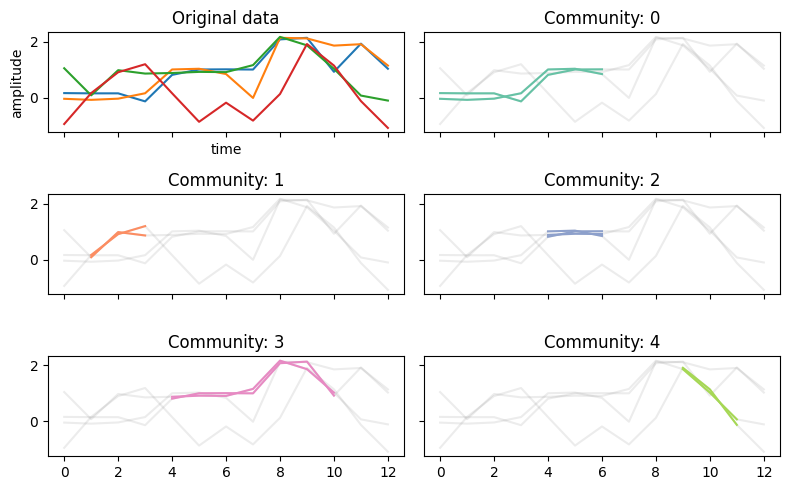

In [ ]:
def community_plot(df, data):
  nrows = int(np.ceil((len(df)+1)/2))
  fig, ax = plt.subplots(nrows, 2, sharex=True, sharey=True, figsize=(8, 2+nrows))
  ax = ax.flatten()
  p = ax[0].plot(data)
  ax[0].set_xlabel('time')
  ax[0].set_ylabel('amplitude')
  ax[0].set_title('Original data')
  for i, row in enumerate(df.iterrows()):
    ax[i+1].plot(data, alpha=0.15, color='gray')
    ax[i+1].plot(np.arange(row[1]['start'],row[1]['end']),data[row[1]['start']:row[1]['end'], row[1]['community']],color=plt.cm.Set2.colors[i])
    ax[i+1].set_title('Community: ' + str(i))
    plt.tight_layout()
  return fig, ax

fig, ax = community_plot(tctc_df, data)

### Jugando con los parámetros

### Epsilon
Si lo hacemos mas grande, incluira mas trayectorias en las comunidades

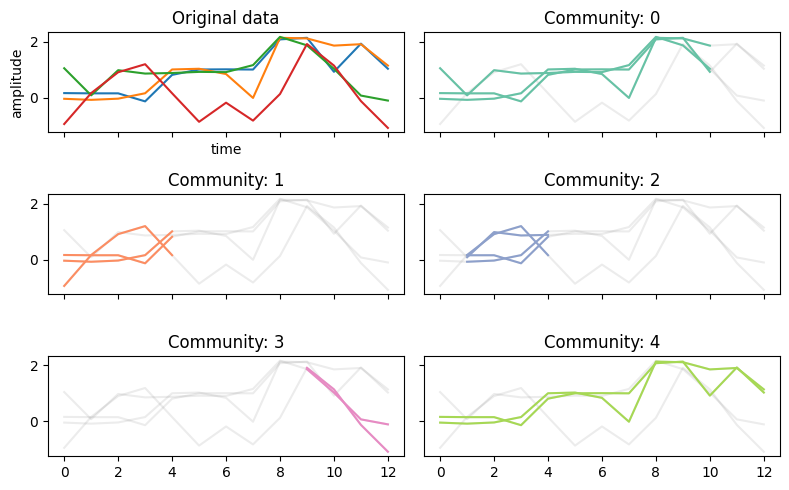

In [ ]:
parameters = {
'epsilon': 1.5,
'tau': 3,
'sigma': 2,
'kappa': 0
}
tctc_df_largeep = tctc(data, **parameters, output='df')
fig, ax = community_plot(tctc_df_largeep, data)

### Tau
Si lo hacemos mas grande, requerira que las trayectorias se conserven por mas nodos

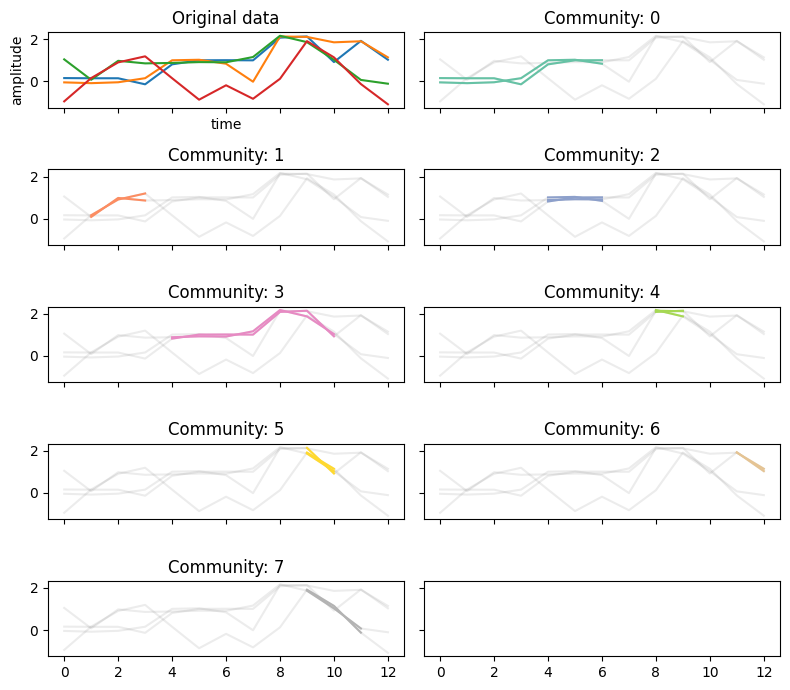

In [ ]:
parameters = {
'epsilon': 0.5,
'tau': 2,
'sigma': 2,
'kappa': 0
}
tctc_df_shorttau = tctc(data, **parameters, output='df')
fig, ax = community_plot(tctc_df_shorttau, data)

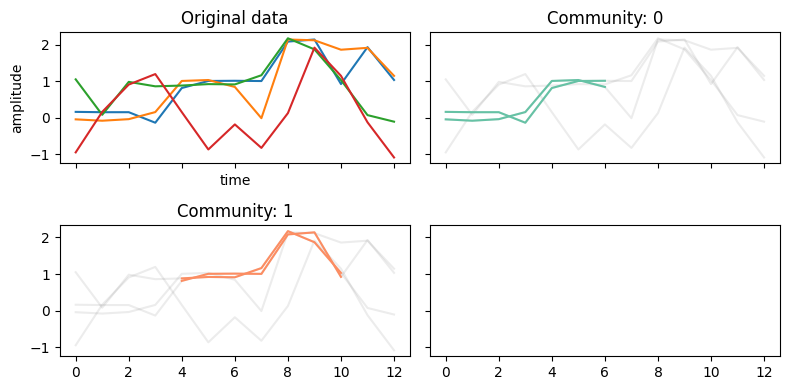

In [ ]:
parameters = {
'epsilon': 0.5,
'tau': 5,
'sigma': 2,
'kappa': 0
}
tctc_df_longtau = tctc(data, **parameters, output='df')
fig, ax = community_plot(tctc_df_longtau, data)

### Sigma
Si sigma es mas grande, requiere que mas nodos formen parte de la trayectoria.

Valores mas pequeños de sigma permiten conexiones "ruidosas"

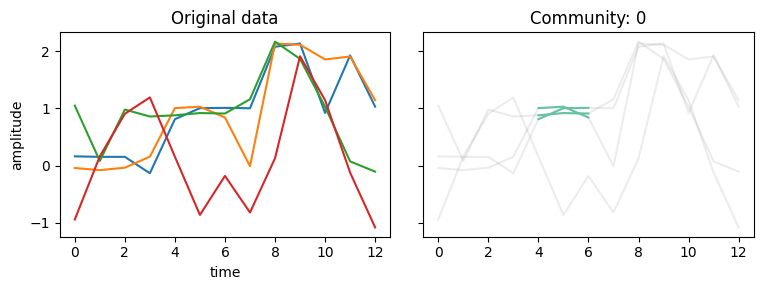

In [ ]:
parameters = {
'epsilon': 0.5,
'tau': 3,
'sigma': 3,
'kappa': 0
}
tctc_df_longsigma = tctc(data, **parameters, output='df')
fig, ax = community_plot(tctc_df_longsigma, data)

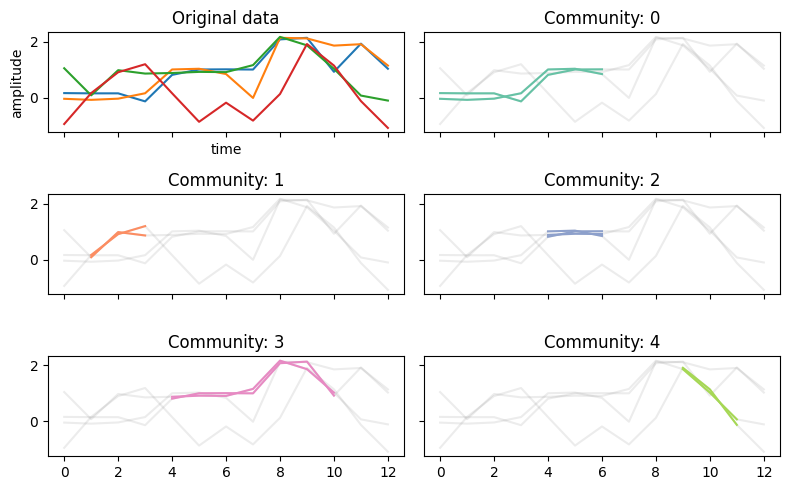

In [ ]:
parameters = {
'epsilon': 0.5,
'tau': 3,
'sigma': 1.4,
'kappa': 0
}
tctc_df_longsigma = tctc(data, **parameters, output='df')
fig, ax = community_plot(tctc_df_longsigma, data)

### Kappa
Si hacemos que sea más grande, permite que exista esa cantidad de puntos temporales “ruidosos” antes de decidir si la trayectoria continúa o no.

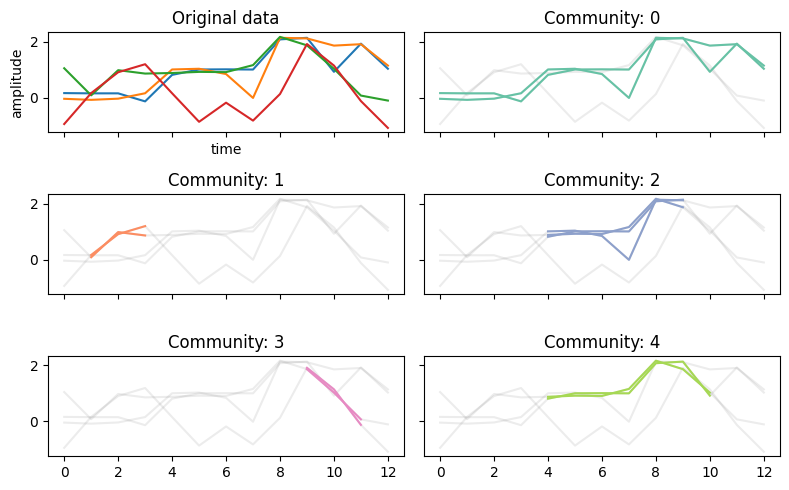

In [ ]:
parameters = {
'epsilon': 0.5,
'tau': 3,
'sigma': 2,
'kappa': 1
}
tctc_df_withkappa = tctc(data, **parameters, output='df')
fig, ax = community_plot(tctc_df_withkappa, data)

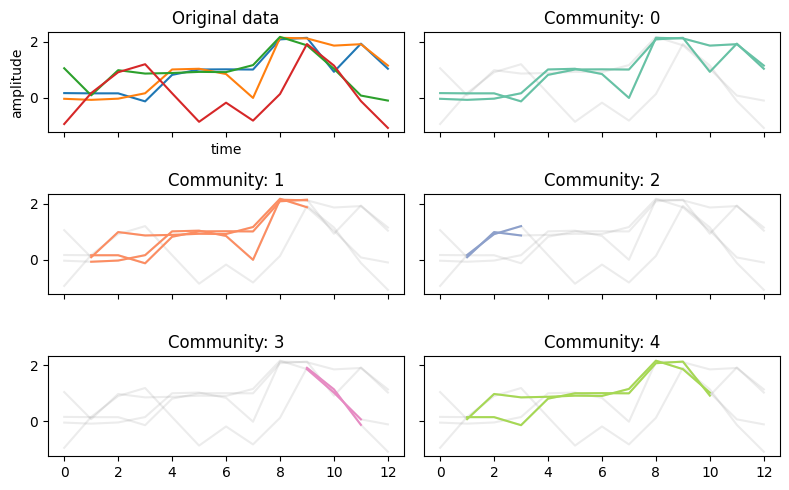

In [ ]:
parameters = {
'epsilon': 0.5,
'tau': 3,
'sigma': 2,
'kappa': 3
}
tctc_df_withkappa = tctc(data, **parameters, output='df')
fig, ax = community_plot(tctc_df_withkappa, data)